## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df=pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
print(df.head(),df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    503
4  2008-08-01 00:00:00       c++    164                      DATE     TAG  POSTS
2658  2024-07-01 00:00:00     php    900
2659  2024-07-01 00:00:00  python   5419
2660  2024-07-01 00:00:00       r   1070
2661  2024-07-01 00:00:00    ruby     94
2662  2024-07-01 00:00:00   swift    603


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(2663, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
df.count()

DATE     2663
TAG      2663
POSTS    2663
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
post_compare=df.groupby('TAG').sum()
print(post_compare)
id=post_compare['POSTS'].idxmax()
print(post_compare.loc[id])

                                                         DATE    POSTS
TAG                                                                   
assembly    2008-08-01 00:00:002008-09-01 00:00:002008-10-...    44606
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   405463
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1619182
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   809386
delphi      2008-08-01 00:00:002008-09-01 00:00:002008-10-...    52062
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    73482
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1917773
javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2530123
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    68167
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1466533
python      2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2201607
r           2008-09-01 00:00:002008-11-01 00:00:002008-12-...   507918
ruby  

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
month_compare=df.groupby('TAG').count()
print(month_compare)
print(month_compare.loc[month_compare.idxmin()])

            DATE  POSTS
TAG                    
assembly     192    192
c            192    192
c#           193    193
c++          192    192
delphi       192    192
go           177    177
java         192    192
javascript   192    192
perl         192    192
php          192    192
python       192    192
r            190    190
ruby         192    192
swift        183    183
     DATE  POSTS
TAG             
go    177    177
go    177    177


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
df.DATE=pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [11]:
reshaped_df=df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,754.0,104.0,NaN,1127.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1147.0,722.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,139.0,734.0,2578.0,1333.0,98.0,322.0,2810.0,4703.0,47.0,1361.0,7352.0,1686.0,139.0,721.0
2024-04-01,184.0,733.0,2720.0,1307.0,105.0,302.0,2567.0,4235.0,26.0,1176.0,7312.0,1532.0,114.0,686.0
2024-05-01,178.0,661.0,2475.0,1424.0,101.0,269.0,2252.0,3983.0,38.0,1148.0,6879.0,1374.0,117.0,612.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [38]:
reshaped_df.shape

(193, 14)

In [39]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [41]:
reshaped_df.count()

TAG
assembly      192
c             192
c#            193
c++           192
delphi        192
go            177
java          192
javascript    192
perl          192
php           192
python        192
r             190
ruby          192
swift         183
dtype: int64

In [42]:
reshaped_df.fillna(0, inplace=True)

In [43]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,161.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,754.0,104.0,0.0,1127.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1147.0,722.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

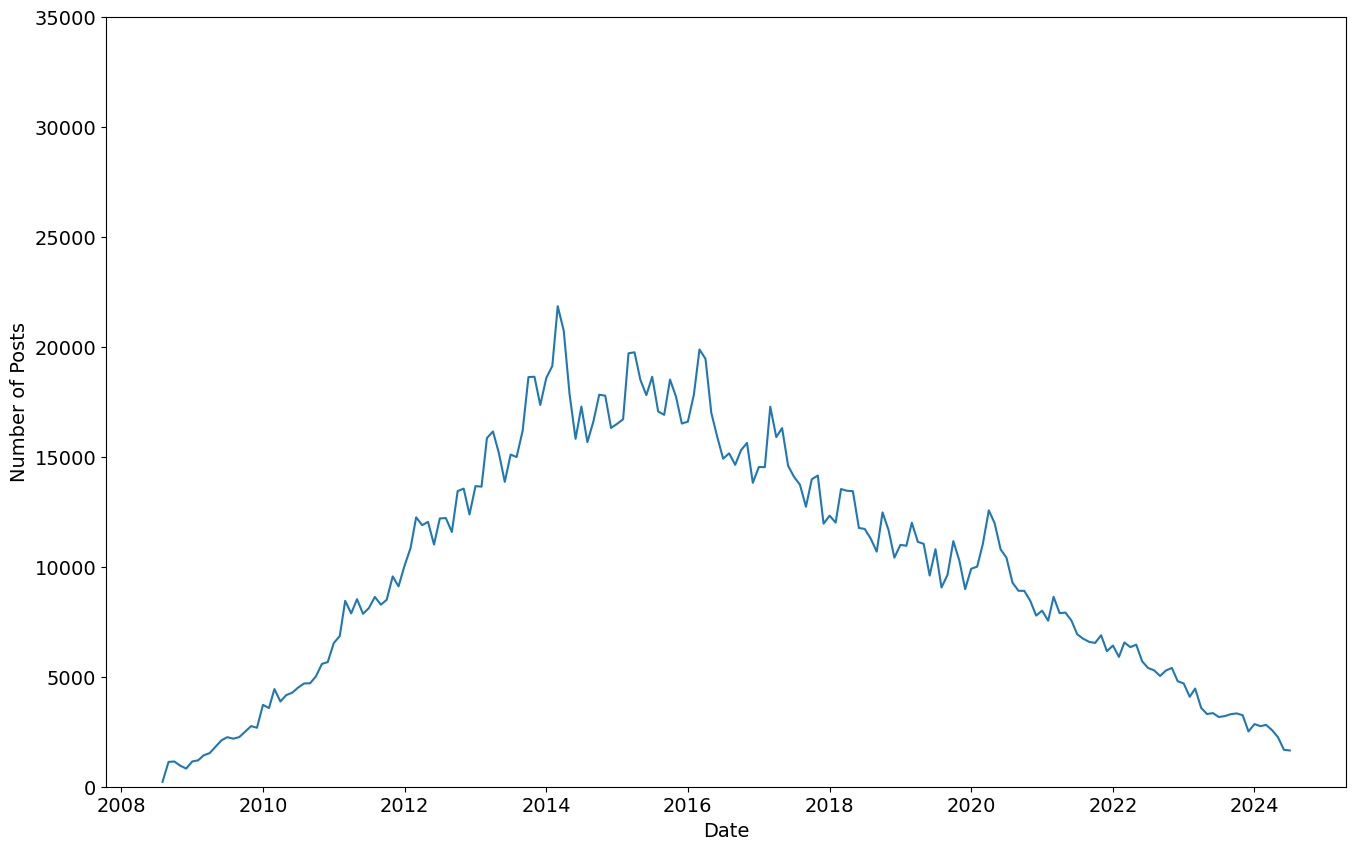

In [14]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

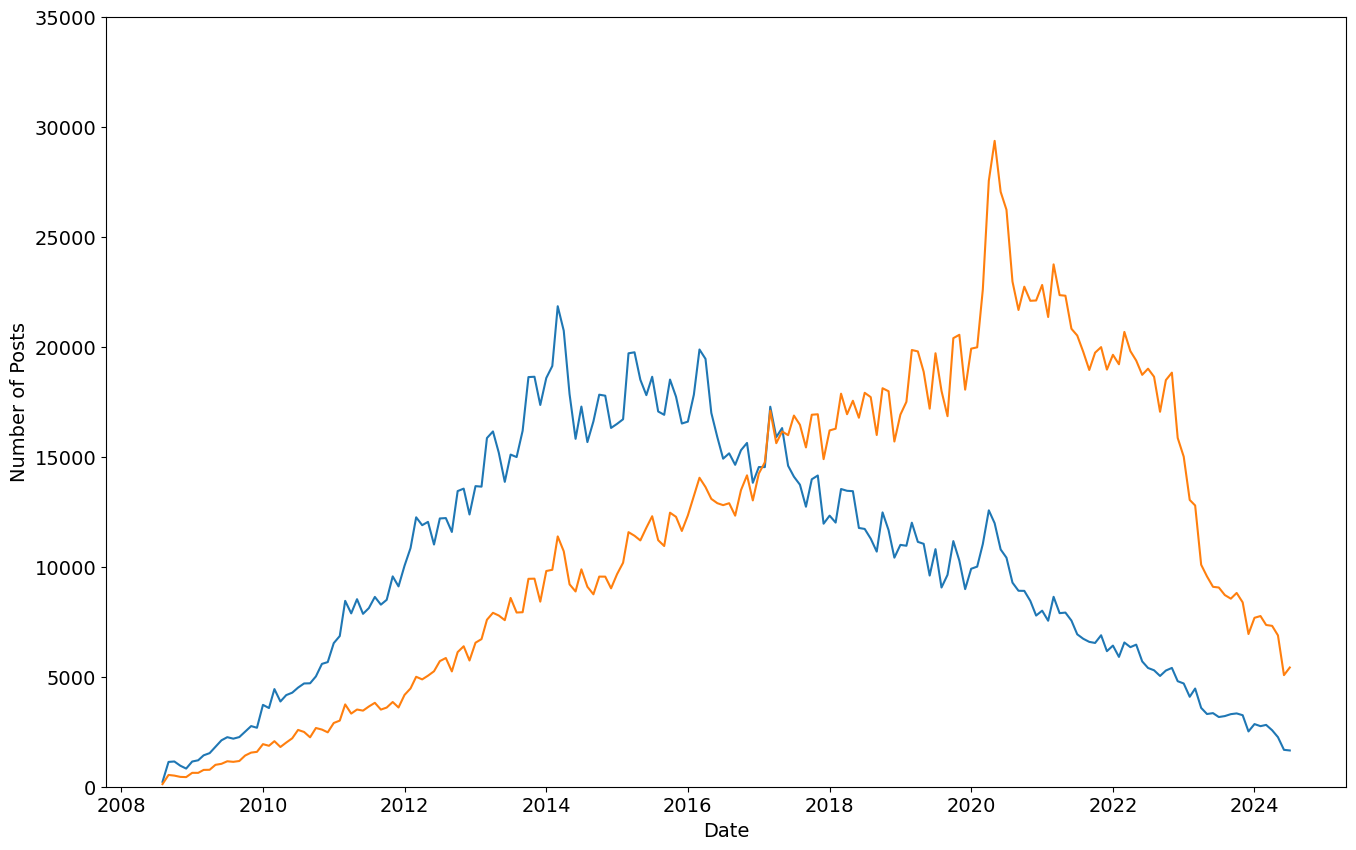

In [16]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df['java'],reshaped_df.index,reshaped_df['python'])

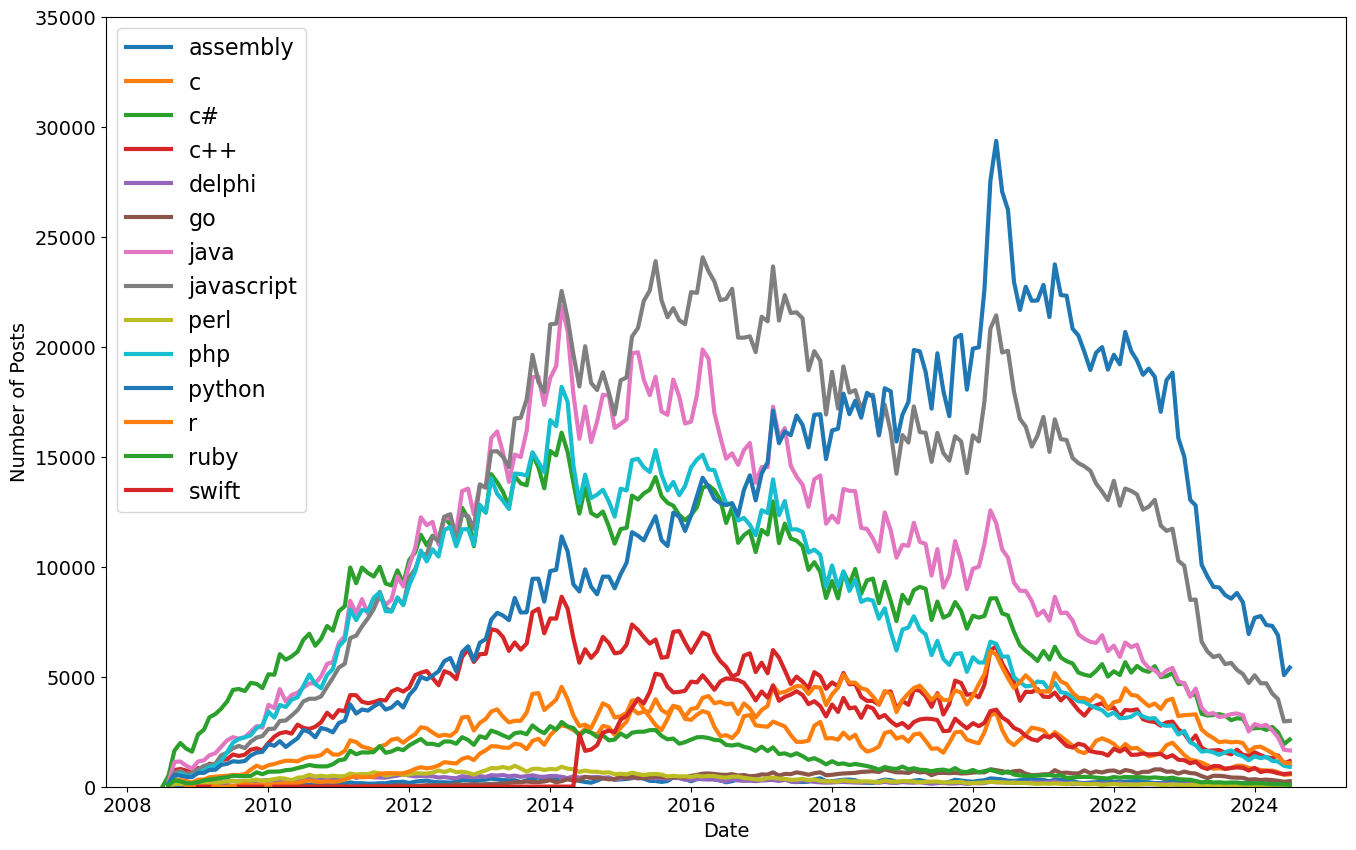

In [19]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

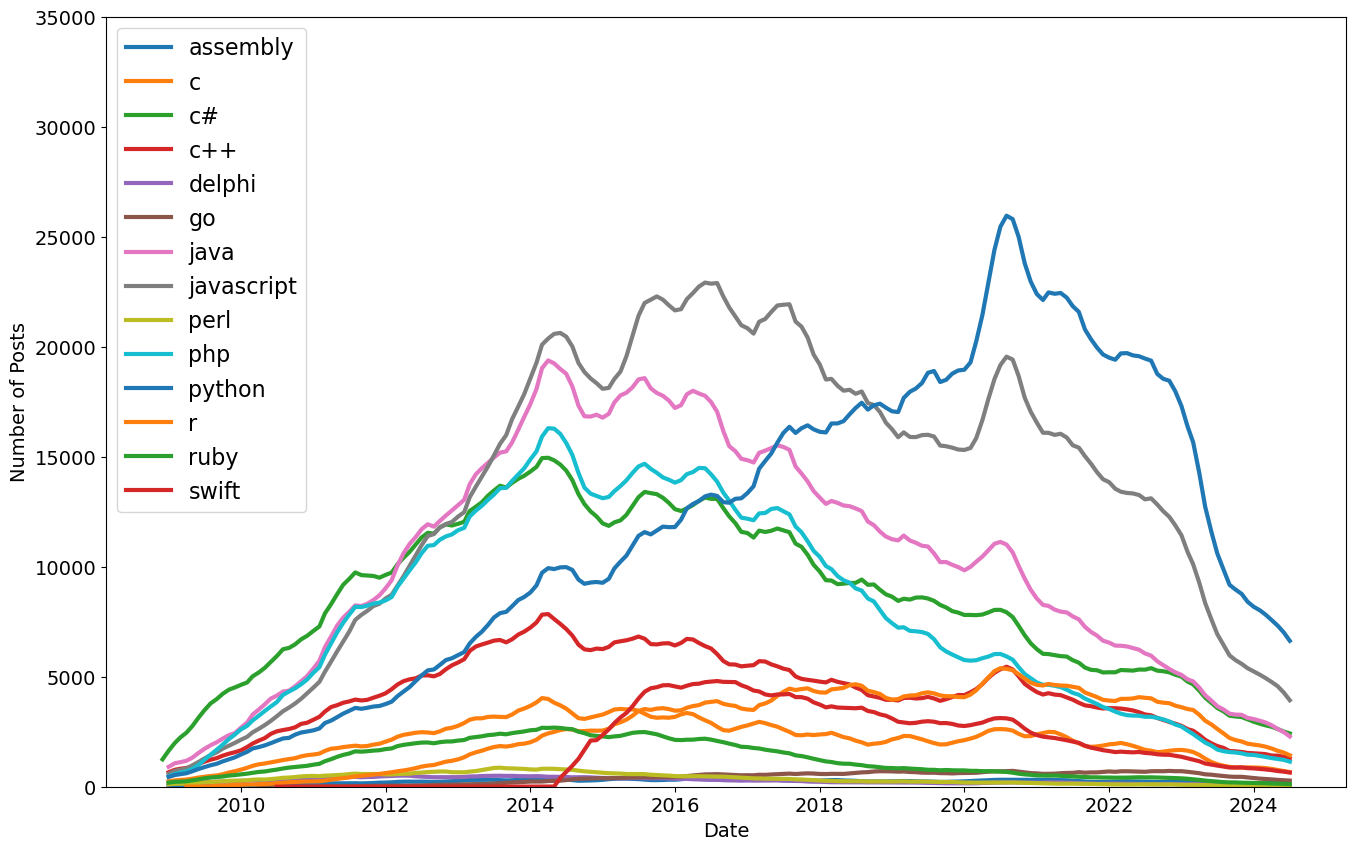

In [23]:
roll_df=reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
for column in roll_df.columns:
    plt.plot(roll_df.index,roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)